<a href="https://colab.research.google.com/github/maideas/numpy-neural-network/blob/master/examples/inception_mnist/inception_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content

/content


In [2]:
!rm -rf numpy-neural-network
!git clone https://github.com/maideas/numpy-neural-network.git

Cloning into 'numpy-neural-network'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 813 (delta 157), reused 252 (delta 125), pack-reused 521
Receiving objects: 100% (813/813), 68.40 MiB | 35.95 MiB/s, done.
Resolving deltas: 100% (448/448), done.


In [3]:
cd /content/numpy-neural-network/examples/inception_mnist/

/content/numpy-neural-network/examples/inception_mnist


In [0]:
!mkdir -p png
!mkdir -p png_2

In [0]:
import sys
sys.path.append("../../")

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy_neural_network as npnn
import npnn_datasets

In [0]:
model = npnn.network.Model([
    npnn.Inception((28, 28, 1),
           2,
        2, 4,
        2, 4,
           2
    ),
    npnn.MaxPool(shape_in=(28, 28, 12), shape_out=(14, 14, 12), kernel_size=2),
    npnn.Inception((14, 14, 12),
            2,
        4,  6,
        4,  6,
            2
    ),
    npnn.MaxPool(shape_in=(14, 14, 16), shape_out=(7, 7, 16), kernel_size=2),
    npnn.Inception((7, 7, 16),
           2,
        6, 6,
        6, 6,
           2
    ),
    npnn.Dense(7*7*16, 140),
    npnn.LeakyReLU(140),
    npnn.Dense(140, 10),
    npnn.Softmax(10)
])

In [0]:
model.loss_layer = npnn.loss_layer.CrossEntropyLoss(10)
optimizer = npnn.optimizer.Adam(model, alpha=1e-3)
optimizer.dataset = npnn_datasets.MNIST()

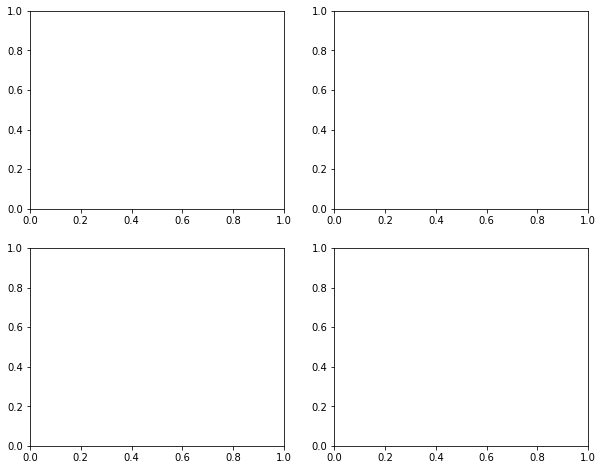

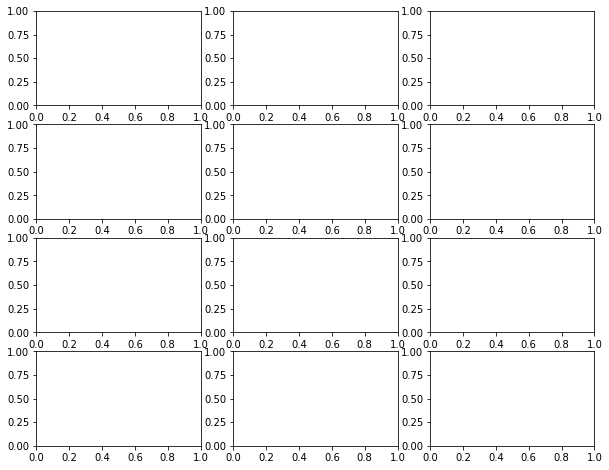

In [9]:
plt.ion()
plt.show()
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

fig2, axs = plt.subplots(4, 3, figsize=(10,8))

episodes = []

mini_train_loss = []
mini_validation_loss = []
mini_train_accuracy = []
mini_validation_accuracy = []

In [0]:
for episode in np.arange(2000):

    # step the optimizer ...
    optimizer.step()
    episodes.append(episode)

    #===========================================================================
    # mini batch loss and accuracy
    #===========================================================================

    tloss = np.mean(optimizer.loss)
    taccuracy = optimizer.accuracy

    mini_train_loss.append(tloss)
    mini_train_accuracy.append(taccuracy)

    ax1.cla()
    ax1.set_xlabel('episode')
    ax1.set_ylabel('train mini-batch loss')
    ax1.set_yscale('log')
    ax1.set_ylim((min(mini_train_loss)/2.0, max(mini_train_loss)*2.0))
    ax1.plot(episodes, mini_train_loss)

    ax2.cla()
    ax2.set_xlabel('episode')
    ax2.set_ylabel('train mini-batch accuracy [%]')
    ax2.set_ylim(-5, 105)
    ax2.plot(episodes, mini_train_accuracy)

    #===========================================================================
    # complete dataset loss and accuracy
    #===========================================================================

    x_validation_batch, t_validation_batch = optimizer.dataset.get_validation_batch()
    y_validation_batch = optimizer.predict(x_validation_batch, t_validation_batch)

    vloss = np.mean(optimizer.loss)
    vaccuracy = optimizer.accuracy

    mini_validation_loss.append(vloss)
    mini_validation_accuracy.append(vaccuracy)

    # print the episode and loss values ...
    print("episode = {0:5d}, tloss = {1:5.3f}, vloss = {2:5.3f}, taccuracy = {3:5.3f}%, vaccuracy = {4:5.3f}%".format(
        episode, tloss, vloss, taccuracy, vaccuracy
    ))

    ax3.cla()
    ax3.set_xlabel('episode')
    ax3.set_ylabel('validation mini-batch loss')
    ax3.set_yscale('log')
    ax3.set_ylim((min(mini_validation_loss)/2.0, max(mini_validation_loss)*2.0))
    ax3.plot(episodes, mini_validation_loss, c='tab:orange')

    ax4.cla()
    ax4.set_xlabel('episode')
    ax4.set_ylabel('validation mini-batch accuracy [%]')
    ax4.set_ylim(-5, 105)
    ax4.plot(episodes, mini_validation_accuracy, c='tab:orange')

    #===========================================================================
    # network output plots (validation batch based)
    #===========================================================================

    k = np.arange(x_validation_batch.shape[0])

    for n in np.arange(4):
        for m in np.arange(3):
            c = n * 3 + m
            if c < 10:
                axs[n, m].cla()
                axs[n, m].set_ylim(-0.1, 1.1)
                axs[n, m].scatter(k, t_validation_batch[:,c], s=10, c='tab:green')
                axs[n, m].scatter(k, y_validation_batch[:,c], s=10, c='tab:orange')

    #===========================================================================
    # draw and save PNG to generate video files later on
    #===========================================================================

    plt.draw()
    fig1.savefig('png/episode{0:04d}.png'.format(episode))
    fig2.savefig('png_2/episode{0:04d}.png'.format(episode))
    plt.pause(0.001)

episode =     0, tloss = 0.250, vloss = 0.231, taccuracy = 8.333%, vaccuracy = 11.765%


<Figure size 432x288 with 0 Axes>

episode =     1, tloss = 0.238, vloss = 0.223, taccuracy = 11.275%, vaccuracy = 17.647%


<Figure size 432x288 with 0 Axes>

episode =     2, tloss = 0.226, vloss = 0.217, taccuracy = 12.745%, vaccuracy = 26.471%


<Figure size 432x288 with 0 Axes>

episode =     3, tloss = 0.215, vloss = 0.217, taccuracy = 26.471%, vaccuracy = 31.373%


<Figure size 432x288 with 0 Axes>

episode =     4, tloss = 0.217, vloss = 0.220, taccuracy = 33.333%, vaccuracy = 35.294%


<Figure size 432x288 with 0 Axes>

episode =     5, tloss = 0.216, vloss = 0.213, taccuracy = 28.922%, vaccuracy = 31.373%


<Figure size 432x288 with 0 Axes>

episode =     6, tloss = 0.213, vloss = 0.205, taccuracy = 34.314%, vaccuracy = 38.725%


<Figure size 432x288 with 0 Axes>

episode =     7, tloss = 0.203, vloss = 0.204, taccuracy = 38.235%, vaccuracy = 41.176%


<Figure size 432x288 with 0 Axes>

episode =     8, tloss = 0.201, vloss = 0.187, taccuracy = 38.235%, vaccuracy = 48.039%


<Figure size 432x288 with 0 Axes>

episode =     9, tloss = 0.197, vloss = 0.202, taccuracy = 39.706%, vaccuracy = 41.667%


<Figure size 432x288 with 0 Axes>

episode =    10, tloss = 0.187, vloss = 0.189, taccuracy = 44.608%, vaccuracy = 46.078%


<Figure size 432x288 with 0 Axes>

episode =    11, tloss = 0.198, vloss = 0.181, taccuracy = 37.745%, vaccuracy = 42.647%


<Figure size 432x288 with 0 Axes>

episode =    12, tloss = 0.190, vloss = 0.183, taccuracy = 45.588%, vaccuracy = 46.569%


<Figure size 432x288 with 0 Axes>

episode =    13, tloss = 0.184, vloss = 0.187, taccuracy = 45.588%, vaccuracy = 45.098%


<Figure size 432x288 with 0 Axes>

episode =    14, tloss = 0.187, vloss = 0.188, taccuracy = 38.725%, vaccuracy = 45.588%


<Figure size 432x288 with 0 Axes>

episode =    15, tloss = 0.176, vloss = 0.179, taccuracy = 45.588%, vaccuracy = 48.039%


<Figure size 432x288 with 0 Axes>

episode =    16, tloss = 0.183, vloss = 0.173, taccuracy = 42.647%, vaccuracy = 46.569%


<Figure size 432x288 with 0 Axes>

episode =    17, tloss = 0.179, vloss = 0.172, taccuracy = 47.059%, vaccuracy = 48.529%


<Figure size 432x288 with 0 Axes>

episode =    18, tloss = 0.181, vloss = 0.168, taccuracy = 46.569%, vaccuracy = 49.510%


<Figure size 432x288 with 0 Axes>

episode =    19, tloss = 0.168, vloss = 0.180, taccuracy = 50.980%, vaccuracy = 54.412%


<Figure size 432x288 with 0 Axes>

episode =    20, tloss = 0.167, vloss = 0.174, taccuracy = 49.510%, vaccuracy = 44.608%


<Figure size 432x288 with 0 Axes>

episode =    21, tloss = 0.172, vloss = 0.171, taccuracy = 47.059%, vaccuracy = 46.569%


<Figure size 432x288 with 0 Axes>

episode =    22, tloss = 0.154, vloss = 0.156, taccuracy = 50.490%, vaccuracy = 50.000%


<Figure size 432x288 with 0 Axes>

episode =    23, tloss = 0.160, vloss = 0.197, taccuracy = 51.961%, vaccuracy = 44.608%


<Figure size 432x288 with 0 Axes>

episode =    24, tloss = 0.164, vloss = 0.164, taccuracy = 48.529%, vaccuracy = 58.333%


<Figure size 432x288 with 0 Axes>

episode =    25, tloss = 0.152, vloss = 0.158, taccuracy = 56.373%, vaccuracy = 50.980%


<Figure size 432x288 with 0 Axes>

episode =    26, tloss = 0.159, vloss = 0.168, taccuracy = 51.961%, vaccuracy = 52.941%


<Figure size 432x288 with 0 Axes>

episode =    27, tloss = 0.159, vloss = 0.152, taccuracy = 57.353%, vaccuracy = 51.961%


<Figure size 432x288 with 0 Axes>

episode =    28, tloss = 0.147, vloss = 0.150, taccuracy = 48.039%, vaccuracy = 53.431%


<Figure size 432x288 with 0 Axes>

episode =    29, tloss = 0.154, vloss = 0.156, taccuracy = 50.490%, vaccuracy = 46.078%


<Figure size 432x288 with 0 Axes>

episode =    30, tloss = 0.144, vloss = 0.163, taccuracy = 51.961%, vaccuracy = 48.039%


<Figure size 432x288 with 0 Axes>

episode =    31, tloss = 0.144, vloss = 0.145, taccuracy = 54.902%, vaccuracy = 52.941%


<Figure size 432x288 with 0 Axes>

episode =    32, tloss = 0.159, vloss = 0.151, taccuracy = 47.059%, vaccuracy = 52.941%


<Figure size 432x288 with 0 Axes>

episode =    33, tloss = 0.144, vloss = 0.146, taccuracy = 53.431%, vaccuracy = 54.412%


<Figure size 432x288 with 0 Axes>

episode =    34, tloss = 0.149, vloss = 0.151, taccuracy = 54.902%, vaccuracy = 57.843%


<Figure size 432x288 with 0 Axes>

episode =    35, tloss = 0.143, vloss = 0.141, taccuracy = 51.961%, vaccuracy = 54.902%


<Figure size 432x288 with 0 Axes>

episode =    36, tloss = 0.140, vloss = 0.135, taccuracy = 53.431%, vaccuracy = 58.333%


<Figure size 432x288 with 0 Axes>

episode =    37, tloss = 0.137, vloss = 0.143, taccuracy = 54.412%, vaccuracy = 53.922%


<Figure size 432x288 with 0 Axes>

episode =    38, tloss = 0.143, vloss = 0.153, taccuracy = 57.353%, vaccuracy = 59.314%


<Figure size 432x288 with 0 Axes>

episode =    39, tloss = 0.140, vloss = 0.136, taccuracy = 62.255%, vaccuracy = 63.235%


<Figure size 432x288 with 0 Axes>

episode =    40, tloss = 0.132, vloss = 0.124, taccuracy = 67.157%, vaccuracy = 64.216%


<Figure size 432x288 with 0 Axes>

episode =    41, tloss = 0.133, vloss = 0.123, taccuracy = 60.294%, vaccuracy = 61.765%


<Figure size 432x288 with 0 Axes>

episode =    42, tloss = 0.123, vloss = 0.137, taccuracy = 66.176%, vaccuracy = 65.196%


<Figure size 432x288 with 0 Axes>

episode =    43, tloss = 0.139, vloss = 0.158, taccuracy = 61.275%, vaccuracy = 54.412%


<Figure size 432x288 with 0 Axes>

episode =    44, tloss = 0.139, vloss = 0.140, taccuracy = 59.804%, vaccuracy = 61.765%


<Figure size 432x288 with 0 Axes>

episode =    45, tloss = 0.119, vloss = 0.122, taccuracy = 62.745%, vaccuracy = 61.765%


<Figure size 432x288 with 0 Axes>

episode =    46, tloss = 0.131, vloss = 0.141, taccuracy = 60.784%, vaccuracy = 52.941%


<Figure size 432x288 with 0 Axes>

episode =    47, tloss = 0.129, vloss = 0.136, taccuracy = 57.353%, vaccuracy = 55.392%


<Figure size 432x288 with 0 Axes>

episode =    48, tloss = 0.133, vloss = 0.126, taccuracy = 59.804%, vaccuracy = 56.373%


<Figure size 432x288 with 0 Axes>

episode =    49, tloss = 0.122, vloss = 0.124, taccuracy = 58.824%, vaccuracy = 58.824%


<Figure size 432x288 with 0 Axes>

episode =    50, tloss = 0.126, vloss = 0.141, taccuracy = 65.196%, vaccuracy = 59.804%


<Figure size 432x288 with 0 Axes>

episode =    51, tloss = 0.127, vloss = 0.135, taccuracy = 62.745%, vaccuracy = 59.314%


<Figure size 432x288 with 0 Axes>

episode =    52, tloss = 0.132, vloss = 0.127, taccuracy = 56.373%, vaccuracy = 59.314%


<Figure size 432x288 with 0 Axes>

# New Section